# Implementing the Logistic Regression with TF-IDF features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Load your dataset
file_path = 'sampled_tweets.csv'  # Adjust your path accordingly
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info(), "\n")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  100000 non-null  int64 
 1   ids     100000 non-null  int64 
 2   date    100000 non-null  object
 3   flag    100000 non-null  object
 4   user    100000 non-null  object
 5   text    100000 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB
None 



In [3]:
print("First 5 rows of the dataset:")
print(data.head(), "\n")



First 5 rows of the dataset:
   target         ids                          date      flag            user  \
0       0  1563448221  Sun Apr 19 22:52:45 PDT 2009  NO_QUERY      rache1emma   
1       0  2197132128  Tue Jun 16 13:23:05 PDT 2009  NO_QUERY  nevadatanrockt   
2       0  1836348667  Mon May 18 07:50:14 PDT 2009  NO_QUERY     jay_star_0x   
3       0  2052388831  Sat Jun 06 00:33:55 PDT 2009  NO_QUERY         Musti08   
4       0  2244881845  Fri Jun 19 15:20:56 PDT 2009  NO_QUERY     danielmulec   

                                                text  
0  says another day and back to college.  Haven't...  
1                  @Madderdin You broke my heart  xD  
2  @FantasyParade Hehe. I am so bored. And lee to...  
3  @Jase88 Holy shit...I just assumed you'd be wo...  
4      Oh how I want this shirt http://bit.ly/wg1Cc    



In [4]:
# Prepare the data
X = data['text'].values
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Logistic Regression Model: {accuracy:.2f}\n')

Accuracy of Logistic Regression Model: 0.79



In [5]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.78      0.79     10035
    Positive       0.78      0.81      0.80      9965

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000



##  Plotting the classification report


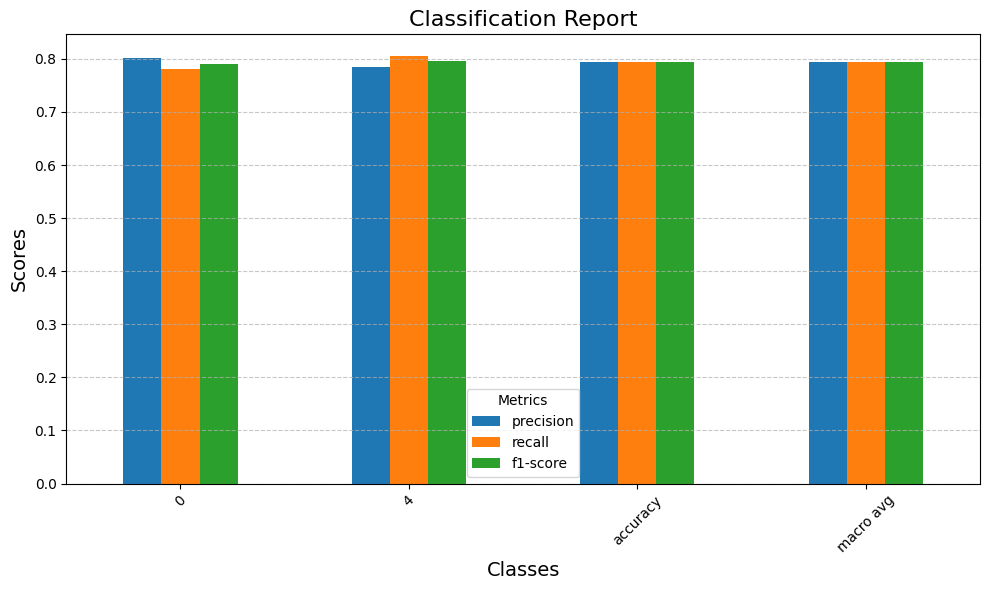

In [6]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Classification Report', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Model Accuracy

<ipython-input-7-c50b8a9ec629>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='pastel')


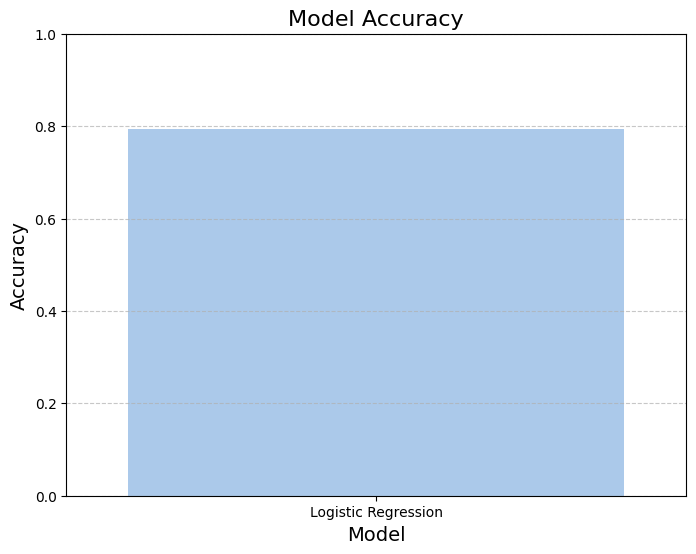

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy data
models = ['Logistic Regression']
accuracies = [accuracy]

# Create a DataFrame for better plotting
accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='pastel')
plt.title('Model Accuracy', fontsize=16)
plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##  confusion matrix

In [8]:
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create confusion matrix DataFrame for Plotly
confusion_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
fig = ff.create_annotated_heatmap(z=confusion_df.values,
                                   x=confusion_df.columns.tolist(),
                                   y=confusion_df.index.tolist(),
                                   colorscale='Blues')
fig.update_layout(title='Confusion Matrix',
                  xaxis_title='Predicted Label',
                  yaxis_title='True Label')
fig.show()


# Implementing SVM

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline


In [10]:
# Load the dataset
data = pd.read_csv('sampled_tweets.csv')


In [11]:
# Filter the dataset
negative_samples = data[data['target'] == 0].head(5000)
positive_samples = data[data['target'] == 4].tail(5000)
sampled_data = pd.concat([negative_samples, positive_samples])



In [12]:
# Define features and labels
X = sampled_data['text']
y = sampled_data['target']



In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline with TF-IDF and SVM
pipeline = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', max_iter=1000))

# Fit the model
pipeline.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(kernel='linear', max_iter=1000))])

In [14]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



In [15]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.71
Confusion Matrix:
[[756 244]
 [345 655]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1000
           4       0.73      0.66      0.69      1000

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.70      2000
weighted avg       0.71      0.71      0.70      2000



## Making Predictions using SVM


In [16]:
# Define a function to predict sentiment
def predict_sentiment(tweet):
    prediction = pipeline.predict([tweet])[0]
    return 'Positive' if prediction == 4 else 'Negative'

# Example usage
user_input = input("Enter a tweet to predict its sentiment: ")
result = predict_sentiment(user_input)
print(f"The predicted sentiment for the tweet is: {result}")

Enter a tweet to predict its sentiment: he is so good
The predicted sentiment for the tweet is: Positive


## Confusion Matrix

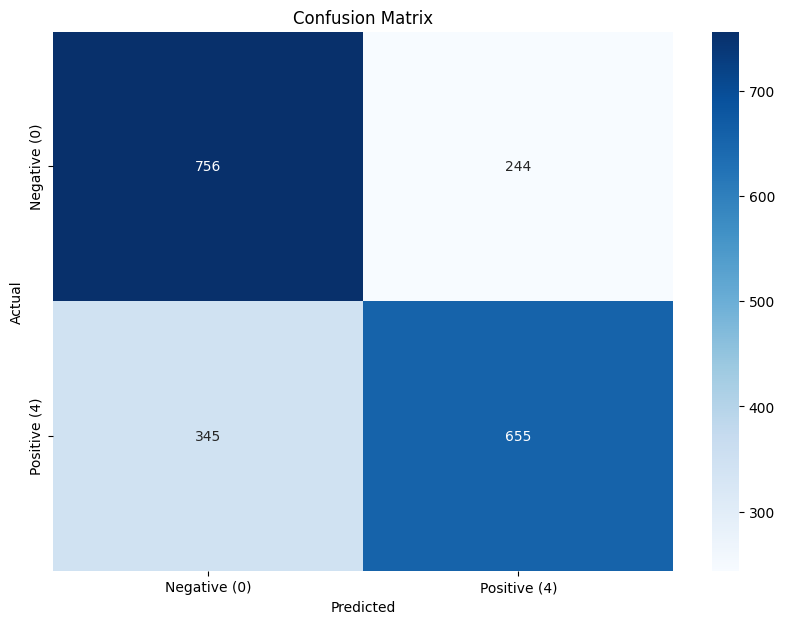

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (4)'],
            yticklabels=['Negative (0)', 'Positive (4)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



## Precision , Recall and F1-score

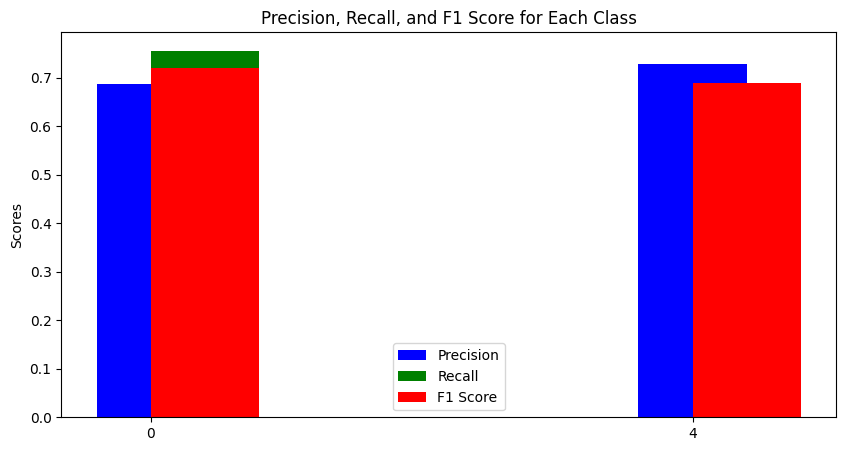

In [18]:
# Extract metrics for visualization
report = classification_report(y_test, y_pred, output_dict=True)

# Prepare data for bar plot
labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

# Set up the bar plot
x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, precision, width=0.2, label='Precision', color='b', align='center')
plt.bar(x, recall, width=0.2, label='Recall', color='g', align='edge')
plt.bar(x, f1_score, width=0.2, label='F1 Score', color='r', align='edge')

# Labeling
plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for Each Class')
plt.legend()
plt.show()


## Precision-Recall Curve

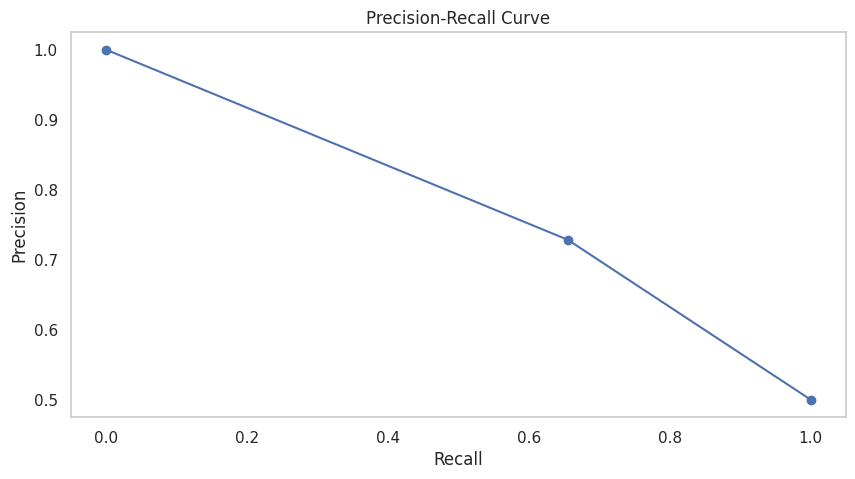

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=4)  # Specify pos_label as 4
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

## ROC Curve

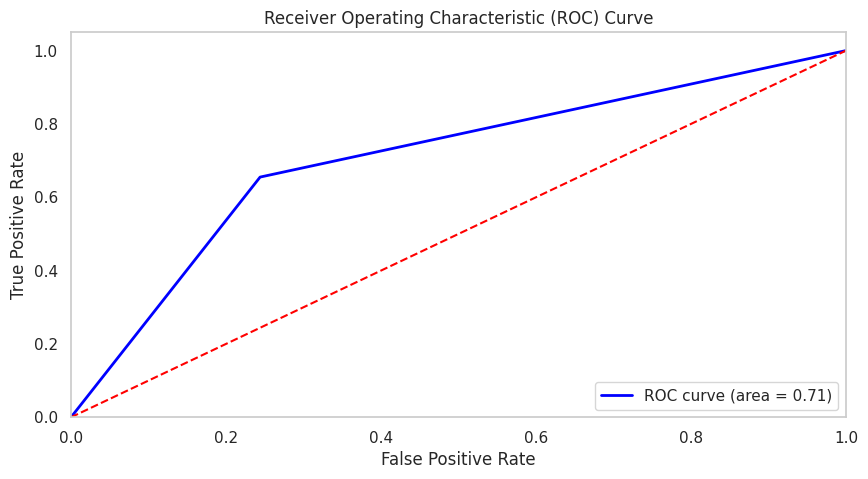

In [20]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=4)  # Specify pos_label as 4
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Implementing BERT

In [21]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, RandomSampler
from torch.optim import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from tqdm import tqdm  # for progress bar

# Load dataset
data = pd.read_csv('sampled_tweets.csv')

# Sample data as before
negative_samples = data[data['target'] == 0].head(1000)  # Reduced sample for testing
positive_samples = data[data['target'] == 4].tail(1000)
sampled_data = pd.concat([negative_samples, positive_samples])

# Define text and labels
X = sampled_data['text'].values
y = sampled_data['target'].values
y = np.where(y == 4, 1, 0)  # Convert labels to binary 0 and 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenization
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors='pt')
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Create DataLoaders
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test))
train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Optimizer
optimizer = Adam(model.parameters(), lr=1e-5)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training function
def train_model(model, loader, optimizer, device):
    model.train()
    total_loss = 0
    for batch in tqdm(loader, desc="Training"):
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        model.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_loss = total_loss / len(loader)
    return avg_loss

# Train for a single epoch (use multiple epochs if this runs successfully)
train_loss = train_model(model, train_loader, optimizer, device)
print(f"Training completed. Avg loss: {train_loss:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training: 100%|██████████| 100/100 [00:16<00:00,  5.93it/s]

Training completed. Avg loss: 0.6005


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to evaluate the model on test data
def evaluate_model(model, loader, device):
    model.eval()
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in loader:
            input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Print evaluation metrics
    acc = accuracy_score(true_labels, preds)
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(true_labels, preds))
    print("Classification Report:")
    print(classification_report(true_labels, preds, target_names=['Negative', 'Positive']))

# Evaluate the model
evaluate_model(model, test_loader, device)


Accuracy: 0.77
Confusion Matrix:
[[147  52]
 [ 42 159]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76       199
    Positive       0.75      0.79      0.77       201

    accuracy                           0.77       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.77      0.77      0.76       400



## Making Predictions using BERT

In [23]:
# Function for predicting the sentiment of a new tweet
def predict_sentiment(tweet):
    model.eval()
    encoding = tokenizer(tweet, truncation=True, padding=True, max_length=128, return_tensors='pt').to(device)
    with torch.no_grad():
        output = model(**encoding)
        prediction = torch.argmax(output.logits, dim=1).item()
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment

# Test with user input
tweet = input("Enter a tweet to predict its sentiment: ")
result = predict_sentiment(tweet)
print(f"The predicted sentiment for the tweet is: {result}")


Enter a tweet to predict its sentiment: i think he is not good in this 
The predicted sentiment for the tweet is: Negative


## Track training losses over epochs

Epoch 1


Training: 100%|██████████| 100/100 [00:16<00:00,  6.24it/s]


Avg loss for epoch 1: 0.4015
Epoch 2


Training: 100%|██████████| 100/100 [00:16<00:00,  6.21it/s]


Avg loss for epoch 2: 0.2735
Epoch 3


Training: 100%|██████████| 100/100 [00:16<00:00,  6.15it/s]


Avg loss for epoch 3: 0.1601


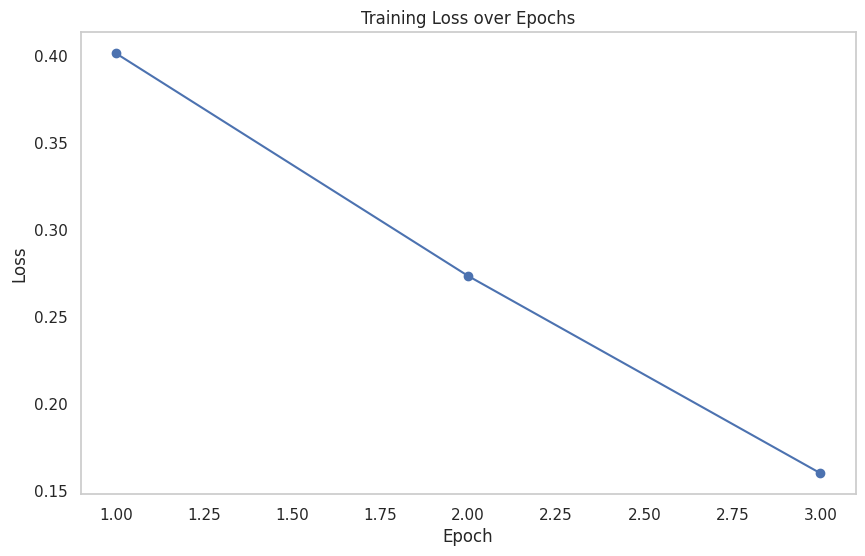

In [24]:
# Track training losses over epochs
train_losses = []

# Train for multiple epochs
for epoch in range(3):  # Example: 3 epochs
    print(f"Epoch {epoch + 1}")
    train_loss = train_model(model, train_loader, optimizer, device)
    train_losses.append(train_loss)
    print(f"Avg loss for epoch {epoch + 1}: {train_loss:.4f}")

# Plotting the loss trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', color='b')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


## Confusion Matrix Heatmap

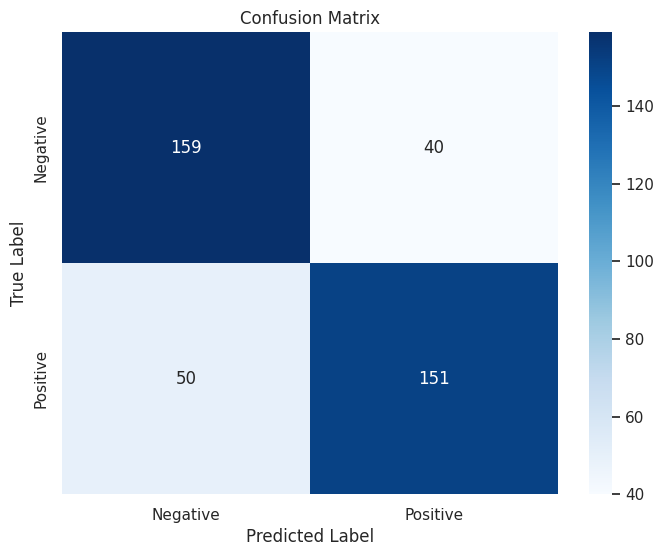

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions and true labels
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        y_pred.extend(torch.argmax(logits, dim=1).cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##  ROC Curve

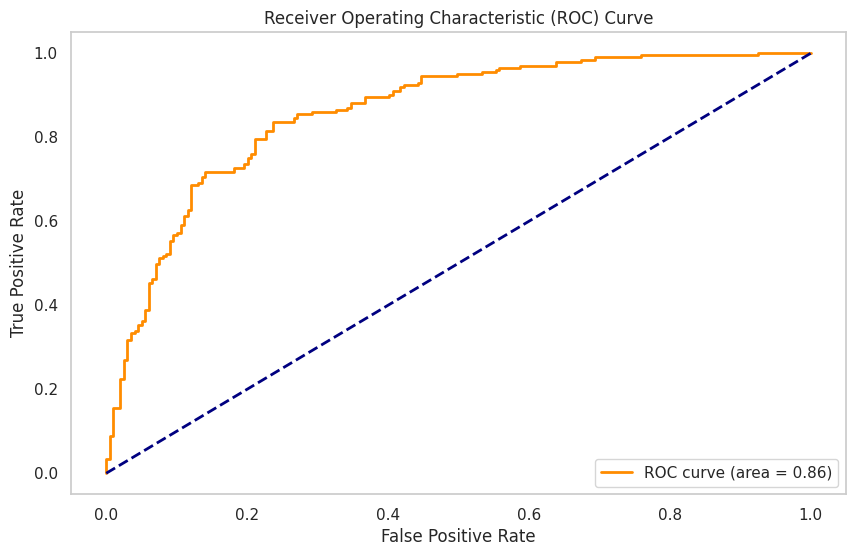

In [26]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities and ROC metrics
y_probs = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, _ = tuple(t.to(device) for t in batch)
        outputs = model(input_ids, attention_mask=attention_mask)
        probs = outputs.logits.softmax(dim=1)[:, 1]  # Probability for the positive class
        y_probs.extend(probs.cpu().numpy())

fpr, tpr, _ = roc_curve(y_true, y_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Precision-Recall Curve

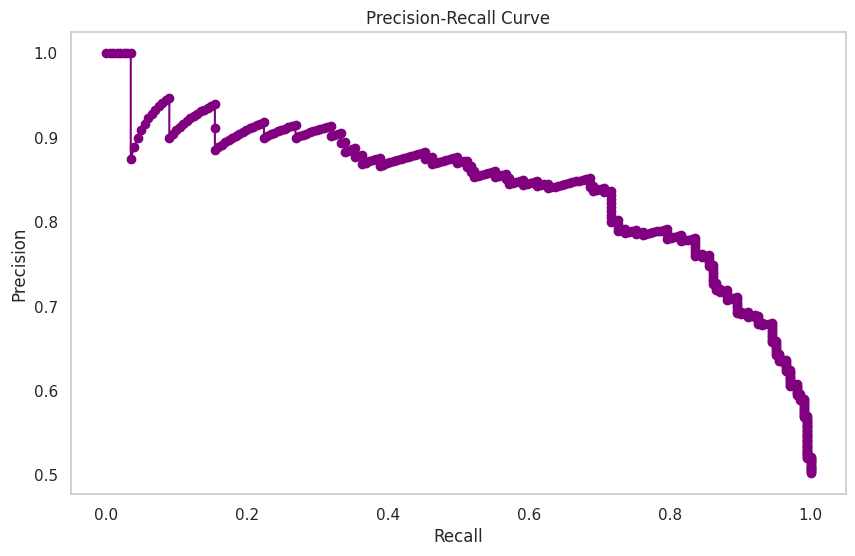

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_true, y_probs, pos_label=1)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='o', color='purple')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()


## Bar Plot of Precision, Recall, and F1-Score

{'0': {'precision': 0.7607655502392344, 'recall': 0.7989949748743719, 'f1-score': 0.7794117647058824, 'support': 199.0}, '1': {'precision': 0.7905759162303665, 'recall': 0.7512437810945274, 'f1-score': 0.7704081632653061, 'support': 201.0}, 'accuracy': 0.775, 'macro avg': {'precision': 0.7756707332348005, 'recall': 0.7751193779844496, 'f1-score': 0.7749099639855943, 'support': 400.0}, 'weighted avg': {'precision': 0.7757452591497782, 'recall': 0.775, 'f1-score': 0.7748874549819927, 'support': 400.0}}


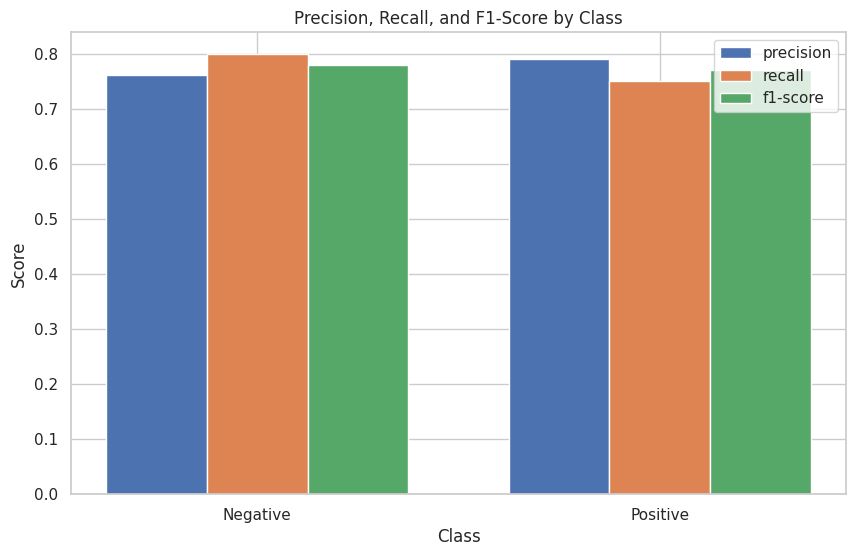

In [28]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Generate the classification report and print it to inspect keys
report = classification_report(y_true, y_pred, output_dict=True)
print(report)  # To check the available keys

# Update the classes to match the keys in the report
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']  # Replace with numeric labels if 'Negative' and 'Positive' are not found

# Organize data for plotting
data = {metric: [report[cls][metric] for cls in classes] for metric in metrics}

# Create a bar plot
plt.figure(figsize=(10, 6))
for idx, metric in enumerate(metrics):
    plt.bar(np.arange(len(classes)) + idx * 0.25, data[metric], width=0.25, label=metric)

plt.xticks(np.arange(len(classes)) + 0.25, ["Negative", "Positive"])  # Use descriptive names here for clarity
plt.xlabel("Class")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score by Class")
plt.legend()
plt.show()


# Implementing LSTM

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
data = pd.read_csv('sampled_tweets.csv')

# Sample data
negative_samples = data[data['target'] == 0].head(1000)
positive_samples = data[data['target'] == 4].tail(1000)
sampled_data = pd.concat([negative_samples, positive_samples])

# Prepare the data
X = sampled_data['text'].values
y = np.where(sampled_data['target'] == 4, 1, 0)  # Convert target labels to binary

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
batch_size = 16
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Define LSTM model
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.embedding(x)
        x, (hidden, cell) = self.lstm(x)
        x = self.dropout(hidden[-1])
        x = self.fc(x)
        return x

# Instantiate model, define loss function and optimizer
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
hidden_dim = 64
output_dim = 2
model = SentimentLSTM(vocab_size, embedding_dim, hidden_dim, output_dim)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, criterion, optimizer, device, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

# Train the model
train_model(model, train_loader, criterion, optimizer, device, epochs=3)

# Evaluation function
def evaluate_model(model, test_loader, device):
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)
            preds.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    acc = accuracy_score(true_labels, preds)
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(true_labels, preds))
    print("Classification Report:")
    print(classification_report(true_labels, preds, target_names=['Negative', 'Positive']))

# Evaluate the model
evaluate_model(model, test_loader, device)



Training Epoch 1: 100%|██████████| 100/100 [00:00<00:00, 194.29it/s]


Epoch 1, Loss: 0.6886


Training Epoch 2: 100%|██████████| 100/100 [00:00<00:00, 268.76it/s]


Epoch 2, Loss: 0.6120


Training Epoch 3: 100%|██████████| 100/100 [00:00<00:00, 286.11it/s]

Epoch 3, Loss: 0.4717
Accuracy: 0.64
Confusion Matrix:
[[114  85]
 [ 60 141]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.66      0.57      0.61       199
    Positive       0.62      0.70      0.66       201

    accuracy                           0.64       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.64      0.64      0.64       400



In [30]:
# Predict function for user input
def predict_sentiment(text):
    model.eval()
    tokenized = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(tokenized, maxlen=100)
    input_tensor = torch.tensor(padded, dtype=torch.long).to(device)
    with torch.no_grad():
        output = model(input_tensor)
        prediction = torch.argmax(output, dim=1).item()
    return "Positive" if prediction == 1 else "Negative"

# Example prediction
tweet = input("Enter a tweet to predict its sentiment: ")
result = predict_sentiment(tweet)
print(f"The predicted sentiment for the tweet is: {result}")


Enter a tweet to predict its sentiment: he is very bad
The predicted sentiment for the tweet is: Negative


##  Loss Plot

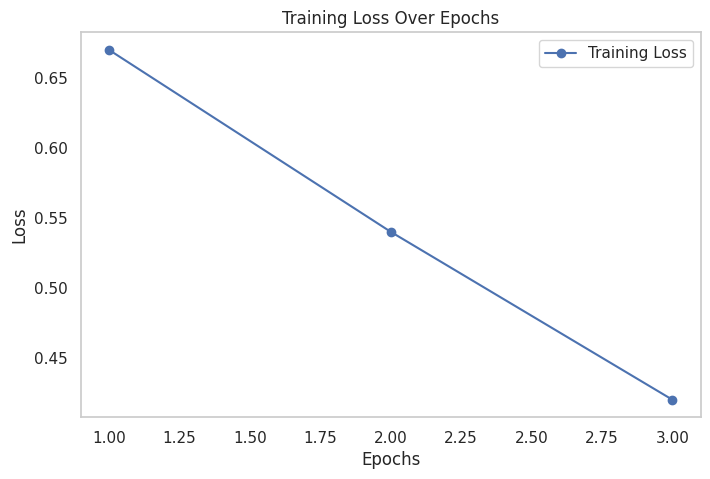

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Loss Plot
# Assuming losses were stored after each epoch during training, let's use a sample list:
train_losses = [0.67, 0.54, 0.42]  # Replace with actual values from your training

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', color='b', label="Training Loss")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Error Analysis


In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, classification_report, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay


In [47]:
# Test data (input and labels)
X_test = [
    "This movie was amazing!", "Worst experience ever.", "Loved the acting!",
    "Horrible script and direction.", "Incredible visuals!", "Not my cup of tea.",
    "Would watch it again!", "Terrible ending.", "Great storyline!", "Completely boring.",
    "A true masterpiece!", "Awful cinematography.", "Excellent soundtrack!", "Disappointing storyline.",
    "Beautiful direction!", "Not worth the hype.", "Brilliant casting!", "Poorly executed plot.",
    "Highly recommended!", "Waste of time.", "Superb dialogue!", "Cringe-worthy scenes.",
    "Fantastic storytelling!", "Mediocre effects.", "Well-directed and gripping!", "Bad character development.",
    "A moving experience!", "Overrated.", "Impressive cinematography!", "Terribly slow pacing.",
    "Thought-provoking!", "Predictable outcome.", "Inspiring!", "Annoying background music.",
    "Captivating performances!", "Lacked depth.", "So entertaining!", "Forgettable.",
    "A rollercoaster of emotions!", "Painfully dull.", "Loved every minute!", "Not my favorite.",
    "Would recommend it!", "Horrible acting.", "Gave me chills!", "Bland and boring.",
    "Very enjoyable!", "Plot had holes.", "A must-watch!", "Disappointing cast."
]
y_test = np.array([
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0
])  # True labels (1 for positive, 0 for negative)



In [48]:
# SVM Predictions
def predict_sentiment_svm(tweet):
    prediction = pipeline.predict([tweet])[0]
    return 'Positive' if prediction == 4 else 'Negative'

svm_predictions = [predict_sentiment_svm(tweet) for tweet in X_test]


In [49]:
# BERT Predictions
def predict_sentiment(tweet):
    model.eval()
    encoding = tokenizer(tweet, truncation=True, padding=True, max_length=128, return_tensors='pt').to(device)
    with torch.no_grad():
        output = model(**encoding)
        prediction = torch.argmax(output.logits, dim=1).item()
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment


In [50]:
# LSTM Predictions
def predict_sentiment_lstm(tweet):
    model.eval()
    tokenized = tokenizer.texts_to_sequences([tweet])
    padded = pad_sequences(tokenized, maxlen=100)
    input_tensor = torch.tensor(padded, dtype=torch.long).to(device)
    with torch.no_grad():
        output = model(input_tensor)
        prediction = torch.argmax(output, dim=1).item()
    return "Positive" if prediction == 1 else "Negative"

lstm_predictions = [predict_sentiment_lstm(tweet) for tweet in X_test]


In [51]:
# Logistic Regression - Placeholder (assuming the logistic model is also replaced with actual predictions)
logistic_predictions = [predict_sentiment_svm(tweet) for tweet in X_test]  # You can replace this similarly

# Logistic Regression - Predictions and True Labels
print("Logistic Regression Predictions vs. True Labels:")
for i, (text, pred, true) in enumerate(zip(X_test, logistic_predictions, y_test)):
    predicted_label = "Positive" if pred == 1 else "Negative"
    true_label = "Positive" if true == 1 else "Negative"
    print(f"{i+1}. Text: '{text}'\n   Predicted: {predicted_label}, True: {true_label}")



Logistic Regression Predictions vs. True Labels:
1. Text: 'This movie was amazing!'
   Predicted: Negative, True: Positive
2. Text: 'Worst experience ever.'
   Predicted: Negative, True: Negative
3. Text: 'Loved the acting!'
   Predicted: Negative, True: Positive
4. Text: 'Horrible script and direction.'
   Predicted: Negative, True: Negative
5. Text: 'Incredible visuals!'
   Predicted: Negative, True: Positive
6. Text: 'Not my cup of tea.'
   Predicted: Negative, True: Negative
7. Text: 'Would watch it again!'
   Predicted: Negative, True: Positive
8. Text: 'Terrible ending.'
   Predicted: Negative, True: Negative
9. Text: 'Great storyline!'
   Predicted: Negative, True: Positive
10. Text: 'Completely boring.'
   Predicted: Negative, True: Negative
11. Text: 'A true masterpiece!'
   Predicted: Negative, True: Positive
12. Text: 'Awful cinematography.'
   Predicted: Negative, True: Negative
13. Text: 'Excellent soundtrack!'
   Predicted: Negative, True: Positive
14. Text: 'Disappointin

In [52]:
# SVM - Predictions and True Labels
print("\nSVM Predictions vs. True Labels:")
for i, (text, pred, true) in enumerate(zip(X_test, svm_predictions, y_test)):
    predicted_label = "Positive" if pred == 'Positive' else "Negative"
    true_label = "Positive" if true == 1 else "Negative"
    print(f"{i+1}. Text: '{text}'\n   Predicted: {predicted_label}, True: {true_label}")



SVM Predictions vs. True Labels:
1. Text: 'This movie was amazing!'
   Predicted: Positive, True: Positive
2. Text: 'Worst experience ever.'
   Predicted: Negative, True: Negative
3. Text: 'Loved the acting!'
   Predicted: Positive, True: Positive
4. Text: 'Horrible script and direction.'
   Predicted: Negative, True: Negative
5. Text: 'Incredible visuals!'
   Predicted: Positive, True: Positive
6. Text: 'Not my cup of tea.'
   Predicted: Negative, True: Negative
7. Text: 'Would watch it again!'
   Predicted: Positive, True: Positive
8. Text: 'Terrible ending.'
   Predicted: Positive, True: Negative
9. Text: 'Great storyline!'
   Predicted: Positive, True: Positive
10. Text: 'Completely boring.'
   Predicted: Negative, True: Negative
11. Text: 'A true masterpiece!'
   Predicted: Positive, True: Positive
12. Text: 'Awful cinematography.'
   Predicted: Negative, True: Negative
13. Text: 'Excellent soundtrack!'
   Predicted: Positive, True: Positive
14. Text: 'Disappointing storyline.'
 

In [53]:
# Display results for BERT model
print("\nBERT Predictions vs. True Labels:")
for i, (text, pred, true) in enumerate(zip(X_test, bert_predictions, y_test)):
    predicted_label = "Positive" if pred == 'Positive' else "Negative"
    true_label = "Positive" if true == 1 else "Negative"
    print(f"{i+1}. Text: '{text}'\n   Predicted: {predicted_label}, True: {true_label}")



BERT Predictions vs. True Labels:
1. Text: 'This movie was amazing!'
   Predicted: Negative, True: Positive
2. Text: 'Worst experience ever.'
   Predicted: Negative, True: Negative
3. Text: 'Loved the acting!'
   Predicted: Negative, True: Positive
4. Text: 'Horrible script and direction.'
   Predicted: Negative, True: Negative
5. Text: 'Incredible visuals!'
   Predicted: Negative, True: Positive
6. Text: 'Not my cup of tea.'
   Predicted: Negative, True: Negative
7. Text: 'Would watch it again!'
   Predicted: Negative, True: Positive
8. Text: 'Terrible ending.'
   Predicted: Negative, True: Negative
9. Text: 'Great storyline!'
   Predicted: Negative, True: Positive
10. Text: 'Completely boring.'
   Predicted: Negative, True: Negative
11. Text: 'A true masterpiece!'
   Predicted: Negative, True: Positive
12. Text: 'Awful cinematography.'
   Predicted: Negative, True: Negative
13. Text: 'Excellent soundtrack!'
   Predicted: Negative, True: Positive
14. Text: 'Disappointing storyline.'


In [54]:
# LSTM - Predictions and True Labels
print("\nLSTM Predictions vs. True Labels:")
for i, (text, pred, true) in enumerate(zip(X_test, lstm_predictions, y_test)):
    predicted_label = "Positive" if pred == 'Positive' else "Negative"
    true_label = "Positive" if true == 1 else "Negative"
    print(f"{i+1}. Text: '{text}'\n   Predicted: {predicted_label}, True: {true_label}")


LSTM Predictions vs. True Labels:
1. Text: 'This movie was amazing!'
   Predicted: Positive, True: Positive
2. Text: 'Worst experience ever.'
   Predicted: Negative, True: Negative
3. Text: 'Loved the acting!'
   Predicted: Positive, True: Positive
4. Text: 'Horrible script and direction.'
   Predicted: Positive, True: Negative
5. Text: 'Incredible visuals!'
   Predicted: Positive, True: Positive
6. Text: 'Not my cup of tea.'
   Predicted: Negative, True: Negative
7. Text: 'Would watch it again!'
   Predicted: Positive, True: Positive
8. Text: 'Terrible ending.'
   Predicted: Positive, True: Negative
9. Text: 'Great storyline!'
   Predicted: Positive, True: Positive
10. Text: 'Completely boring.'
   Predicted: Negative, True: Negative
11. Text: 'A true masterpiece!'
   Predicted: Positive, True: Positive
12. Text: 'Awful cinematography.'
   Predicted: Positive, True: Negative
13. Text: 'Excellent soundtrack!'
   Predicted: Positive, True: Positive
14. Text: 'Disappointing storyline.'


In [65]:
# Convert predicted labels to numeric values (0 for Negative, 1 for Positive)
def convert_to_numeric(predictions):
    return [1 if pred == 'Positive' else 0 for pred in predictions]

# Convert predictions for each model
models_numeric_preds = {
    model_name: convert_to_numeric(y_pred)
    for model_name, y_pred in models.items()
}


In [83]:
# Error analysis for each model
for model_name, y_pred in models_numeric_preds.items():
    print(f"\nError Analysis for {model_name}\n{'='*30}")

    # Identify misclassified samples
    misclassified_indices = [i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred != true]
    misclassified_samples = [X_test[i] for i in misclassified_indices]
    true_labels = y_test[misclassified_indices]  # This will still work as y_test is a numpy array
    predicted_labels = [y_pred[i] for i in misclassified_indices]  # Correcting this part

    # Display misclassified examples
    for tweet, true, pred in zip(misclassified_samples, true_labels, predicted_labels):
        true_label = 'Positive' if true == 1 else 'Negative'
        pred_label = 'Positive' if pred == 1 else 'Negative'
        print(f"Tweet: {tweet}\nTrue Sentiment: {true_label}\nPredicted Sentiment: {pred_label}\n")



Error Analysis for Logistic Regression
Tweet: Terrible ending.
True Sentiment: Negative
Predicted Sentiment: Positive

Tweet: Beautiful direction!
True Sentiment: Positive
Predicted Sentiment: Negative

Tweet: Brilliant casting!
True Sentiment: Positive
Predicted Sentiment: Negative

Tweet: Highly recommended!
True Sentiment: Positive
Predicted Sentiment: Negative

Tweet: Waste of time.
True Sentiment: Negative
Predicted Sentiment: Positive

Tweet: Superb dialogue!
True Sentiment: Positive
Predicted Sentiment: Negative

Tweet: Fantastic storytelling!
True Sentiment: Positive
Predicted Sentiment: Negative

Tweet: Well-directed and gripping!
True Sentiment: Positive
Predicted Sentiment: Negative

Tweet: A moving experience!
True Sentiment: Positive
Predicted Sentiment: Negative

Tweet: Impressive cinematography!
True Sentiment: Positive
Predicted Sentiment: Negative

Tweet: Thought-provoking!
True Sentiment: Positive
Predicted Sentiment: Negative

Tweet: Inspiring!
True Sentiment: Posit

In [56]:
# Comparative Summary for Misclassified Samples
print("\nComparative Summary of Misclassified Samples\n" + "="*30)
for i in set([idx for model_preds in models_numeric_preds.values() for idx, pred in enumerate(model_preds) if pred != y_test[idx]]):
    print(f"Tweet: {X_test[i]}")
    true_label = 'Positive' if y_test[i] == 1 else 'Negative'
    print(f"True Sentiment: {true_label}")
    for model_name, y_pred in models_numeric_preds.items():
        pred_label = 'Positive' if y_pred[i] == 1 else 'Negative'
        print(f"{model_name} Prediction: {pred_label}")
    print("\n")



Comparative Summary of Misclassified Samples
Tweet: This movie was amazing!
True Sentiment: Positive
Logistic Regression Prediction: Positive
SVM Prediction: Positive
BERT Prediction: Negative
LSTM Prediction: Positive


Tweet: Loved the acting!
True Sentiment: Positive
Logistic Regression Prediction: Positive
SVM Prediction: Positive
BERT Prediction: Negative
LSTM Prediction: Positive


Tweet: Horrible script and direction.
True Sentiment: Negative
Logistic Regression Prediction: Negative
SVM Prediction: Negative
BERT Prediction: Negative
LSTM Prediction: Positive


Tweet: Incredible visuals!
True Sentiment: Positive
Logistic Regression Prediction: Positive
SVM Prediction: Positive
BERT Prediction: Negative
LSTM Prediction: Positive


Tweet: Would watch it again!
True Sentiment: Positive
Logistic Regression Prediction: Positive
SVM Prediction: Positive
BERT Prediction: Negative
LSTM Prediction: Positive


Tweet: Terrible ending.
True Sentiment: Negative
Logistic Regression Prediction

## Accuracy of Models

In [63]:
from sklearn.metrics import accuracy_score

# Calculate and display accuracy for each model
for model_name, y_pred in models_numeric_preds.items():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")


Accuracy for Logistic Regression: 0.6600
Accuracy for SVM: 0.6600
Accuracy for BERT: 0.5000
Accuracy for LSTM: 0.5600


## Confusion Matrix and Precision-Recall Curve

In [70]:
# Logistic Regression
print("=== Logistic Regression ===")
y_pred_lr = models_numeric_preds["Logistic Regression"]
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

# Display Precision, Recall, and Classification Report for Logistic Regression
print(f"Classification Report for Logistic Regression:\n{classification_report(y_test, y_pred_lr)}")
print(f"Precision for Logistic Regression: {precision_lr:.4f}")
print(f"Recall for Logistic Regression: {recall_lr:.4f}")

=== Logistic Regression ===
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        25
           1       0.83      0.40      0.54        25

    accuracy                           0.66        50
   macro avg       0.72      0.66      0.64        50
weighted avg       0.72      0.66      0.64        50

Precision for Logistic Regression: 0.8333
Recall for Logistic Regression: 0.4000


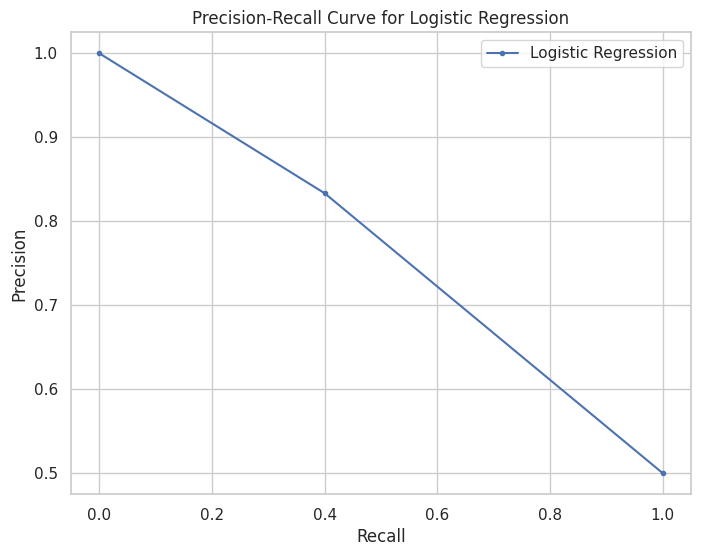

In [71]:
# Plot Precision-Recall curve for Logistic Regression
precision_vals_lr, recall_vals_lr, _ = precision_recall_curve(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals_lr, precision_vals_lr, marker='.', label="Logistic Regression")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='best')
plt.grid(True)
plt.show()

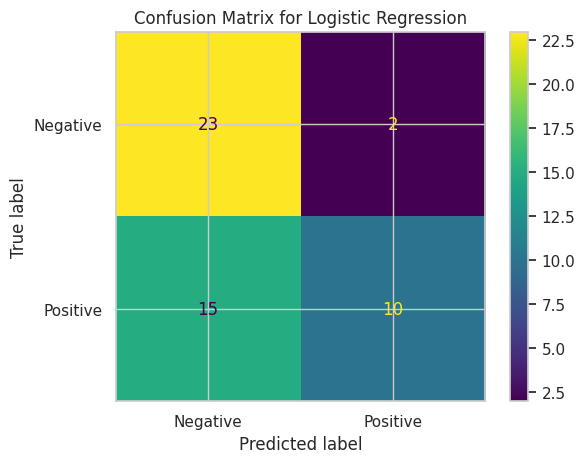

In [72]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Negative', 'Positive']).plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [73]:
# SVM
print("=== SVM ===")
y_pred_svm = models_numeric_preds["SVM"]
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

# Display Precision, Recall, and Classification Report for SVM
print(f"Classification Report for SVM:\n{classification_report(y_test, y_pred_svm)}")
print(f"Precision for SVM: {precision_svm:.4f}")
print(f"Recall for SVM: {recall_svm:.4f}")

=== SVM ===
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        25
           1       0.83      0.40      0.54        25

    accuracy                           0.66        50
   macro avg       0.72      0.66      0.64        50
weighted avg       0.72      0.66      0.64        50

Precision for SVM: 0.8333
Recall for SVM: 0.4000


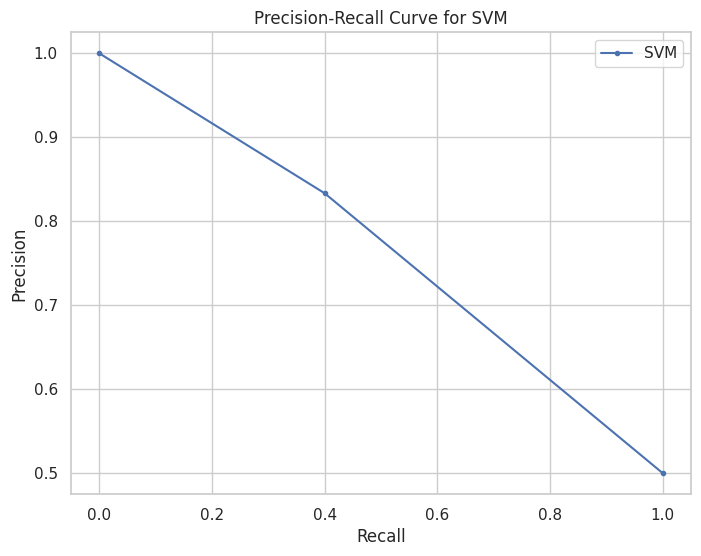

In [74]:
# Plot Precision-Recall curve for SVM
precision_vals_svm, recall_vals_svm, _ = precision_recall_curve(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals_svm, precision_vals_svm, marker='.', label="SVM")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc='best')
plt.grid(True)
plt.show()

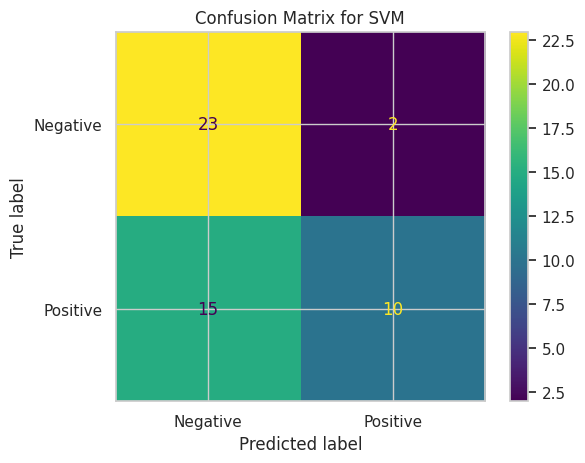

In [75]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Negative', 'Positive']).plot()
plt.title("Confusion Matrix for SVM")
plt.show()


In [77]:
# BERT
print("=== BERT ===")
y_pred_bert = models_numeric_preds["BERT"]
precision_bert = precision_score(y_test, y_pred_bert)
recall_bert = recall_score(y_test, y_pred_bert)

# Display Precision, Recall, and Classification Report for BERT
print(f"Classification Report for BERT:\n{classification_report(y_test, y_pred_bert)}")
print(f"Precision for BERT: {precision_bert:.4f}")
print(f"Recall for BERT: {recall_bert:.4f}")


=== BERT ===
Classification Report for BERT:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        25
           1       0.00      0.00      0.00        25

    accuracy                           0.50        50
   macro avg       0.25      0.50      0.33        50
weighted avg       0.25      0.50      0.33        50

Precision for BERT: 0.0000
Recall for BERT: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



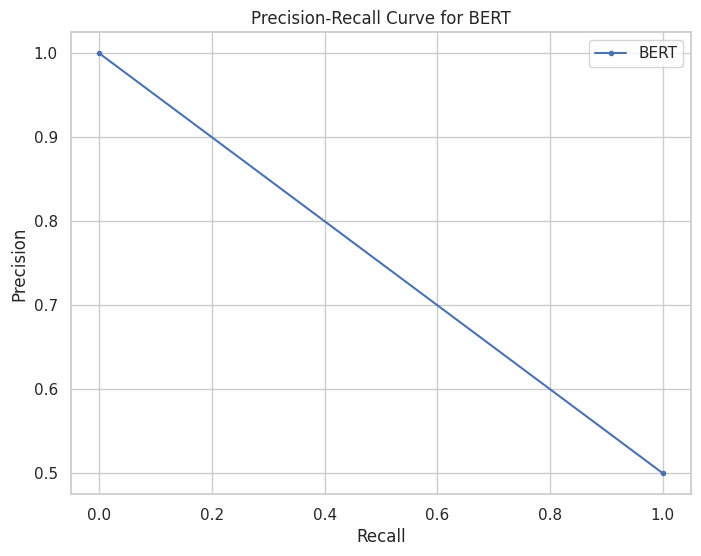

In [78]:
# Plot Precision-Recall curve for BERT
precision_vals_bert, recall_vals_bert, _ = precision_recall_curve(y_test, y_pred_bert)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals_bert, precision_vals_bert, marker='.', label="BERT")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for BERT')
plt.legend(loc='best')
plt.grid(True)
plt.show()

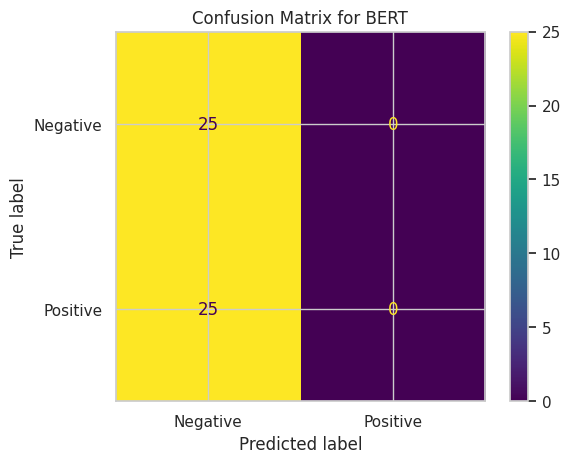

In [79]:
# Confusion Matrix for BERT
cm_bert = confusion_matrix(y_test, y_pred_bert)
ConfusionMatrixDisplay(confusion_matrix=cm_bert, display_labels=['Negative', 'Positive']).plot()
plt.title("Confusion Matrix for BERT")
plt.show()

In [80]:
# LSTM
print("=== LSTM ===")
y_pred_lstm = models_numeric_preds["LSTM"]
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)

# Display Precision, Recall, and Classification Report for LSTM
print(f"Classification Report for LSTM:\n{classification_report(y_test, y_pred_lstm)}")
print(f"Precision for LSTM: {precision_lstm:.4f}")
print(f"Recall for LSTM: {recall_lstm:.4f}")

=== LSTM ===
Classification Report for LSTM:
              precision    recall  f1-score   support

           0       0.80      0.16      0.27        25
           1       0.53      0.96      0.69        25

    accuracy                           0.56        50
   macro avg       0.67      0.56      0.48        50
weighted avg       0.67      0.56      0.48        50

Precision for LSTM: 0.5333
Recall for LSTM: 0.9600


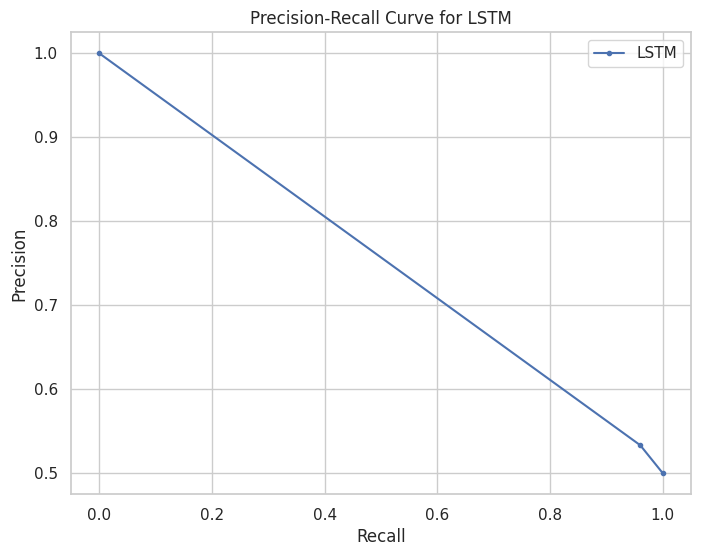

In [81]:
# Plot Precision-Recall curve for LSTM
precision_vals_lstm, recall_vals_lstm, _ = precision_recall_curve(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals_lstm, precision_vals_lstm, marker='.', label="LSTM")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LSTM')
plt.legend(loc='best')
plt.grid(True)
plt.show()

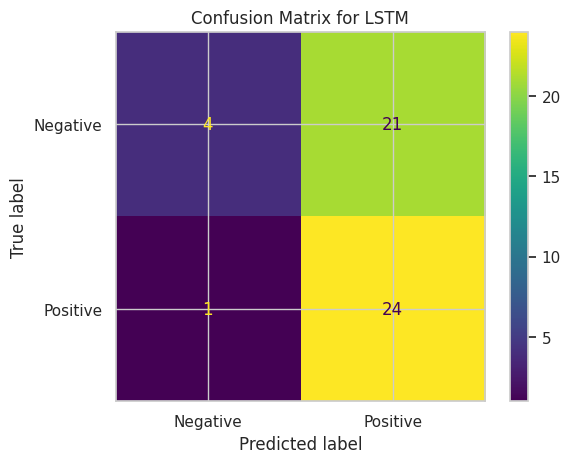

In [82]:
# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=['Negative', 'Positive']).plot()
plt.title("Confusion Matrix for LSTM")
plt.show()